In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
ldir = os.chdir(r'C:\Users\Ördög Tamás\Downloads')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
data = pd.read_csv("vszam.csv", header=None, names=['Sales'], skiprows=1 )

In [2]:
months_per_year = 12
start_year = 2015
end_year = 2019
months = [f"{y}-{m:02d}" for y in range(start_year, end_year+1) for m in range(1, months_per_year+1)]
time_series = pd.Series(data['Sales'].values, index=months)
df = pd.DataFrame({'Month': pd.to_datetime(time_series.index), 'Sales': time_series.values})

In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].astype('datetime64[ns]')
df = df.set_index('Month')
df.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [4]:
ts = df["Sales"]
ts['2017']

Month
2017-01-01     444
2017-02-01     563
2017-03-01     751
2017-04-01     603
2017-05-01     769
2017-06-01     605
2017-07-01     562
2017-08-01     694
2017-09-01     789
2017-10-01    1024
2017-11-01    1156
2017-12-01    1350
Name: Sales, dtype: int64

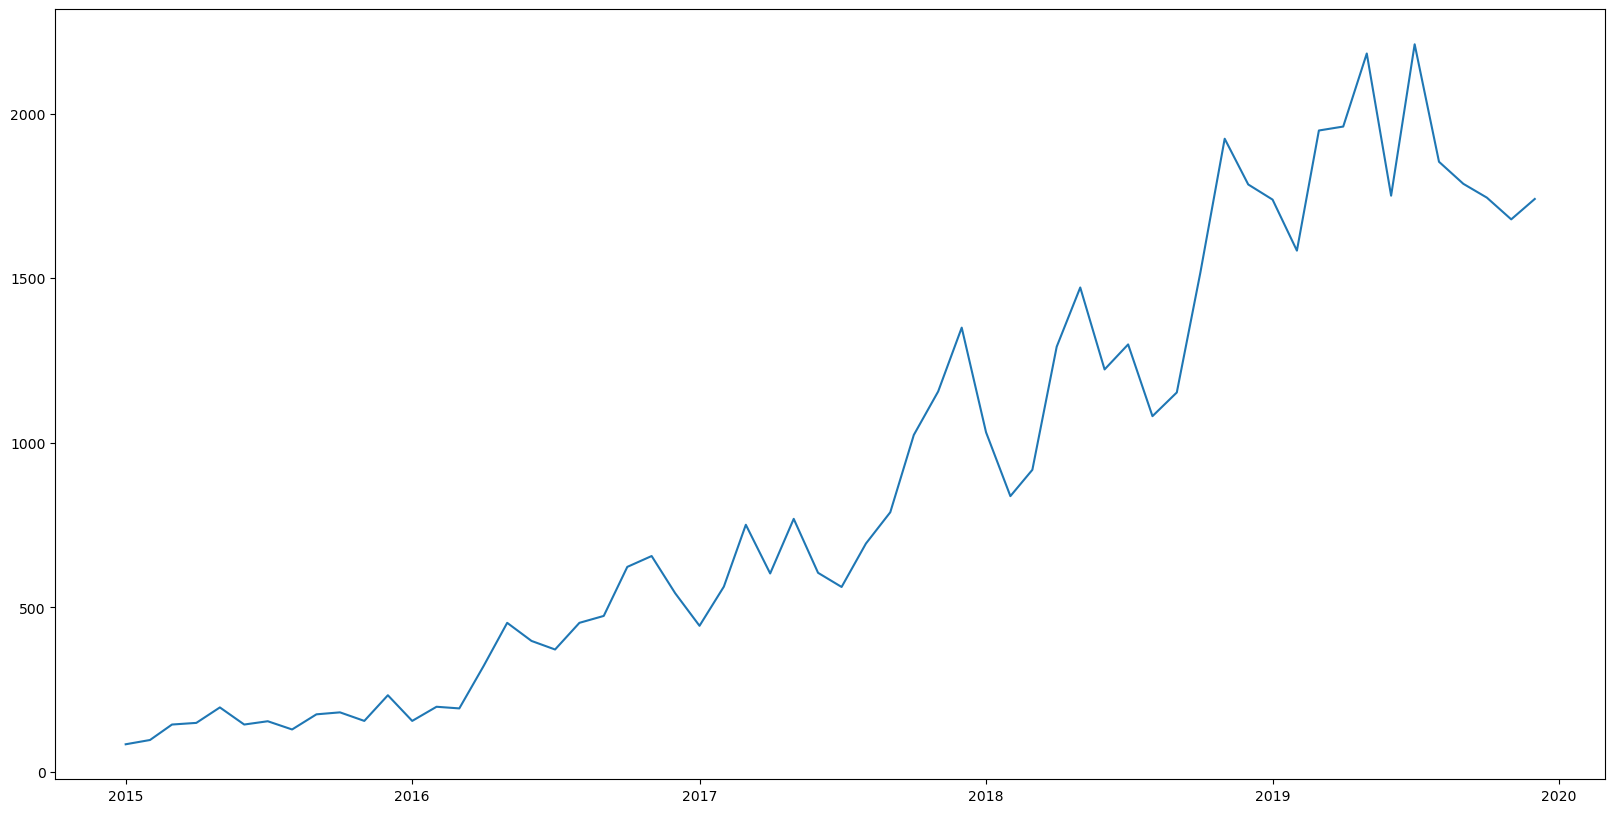

In [5]:
plt.plot(ts)

In [6]:
#1.a
time_points = np.arange(len(df))
sales = df['Sales'].values

linear_params = np.polyfit(time_points, sales, 1)

slope, intercept = linear_params

new_time_points = np.arange(len(df), len(df) + 3)

forecasted_sales = slope * new_time_points + intercept

print("Forecasted sales for the first 3 months of 2020:")
for month, sales_value in zip(range(1, 4), forecasted_sales):
    print(f"2020-{month:02d}: {sales_value:.2f}")

Forecasted sales for the first 3 months of 2020:
2020-01: 1983.28
2020-02: 2018.96
2020-03: 2054.64


In [7]:
forecasted_months = [f"2020-{month:02d}" for month in range(1, 4)]
forecasted_sales_values = forecasted_sales.tolist()
new_rows = pd.DataFrame({
    'Month': forecasted_months,
    'Sales': forecasted_sales_values
})


In [8]:
df2020 = df.copy()

In [9]:
new_rows['Month'] = pd.to_datetime(new_rows['Month'])
new_rows['Month'] = new_rows['Month'].astype('datetime64[ns]')
new_rows = new_rows.set_index('Month')
new_rows.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', name='Month', freq=None)

In [14]:
df2020 = pd.concat([df2020, new_rows], axis=0)

In [15]:
df2020

,Sales
Month,
2015-01-01,84.000000
2015-02-01,97.000000
2015-03-01,144.000000
2015-04-01,149.000000
2015-05-01,196.000000
...,...
2019-11-01,1679.000000
2019-12-01,1741.000000
2020-01-01,1983.284746


In [16]:
ts = df2020["Sales"]
ts['2020']

Month
2020-01-01    1983.284746
2020-02-01    2018.961295
2020-03-01    2054.637844
Name: Sales, dtype: float64

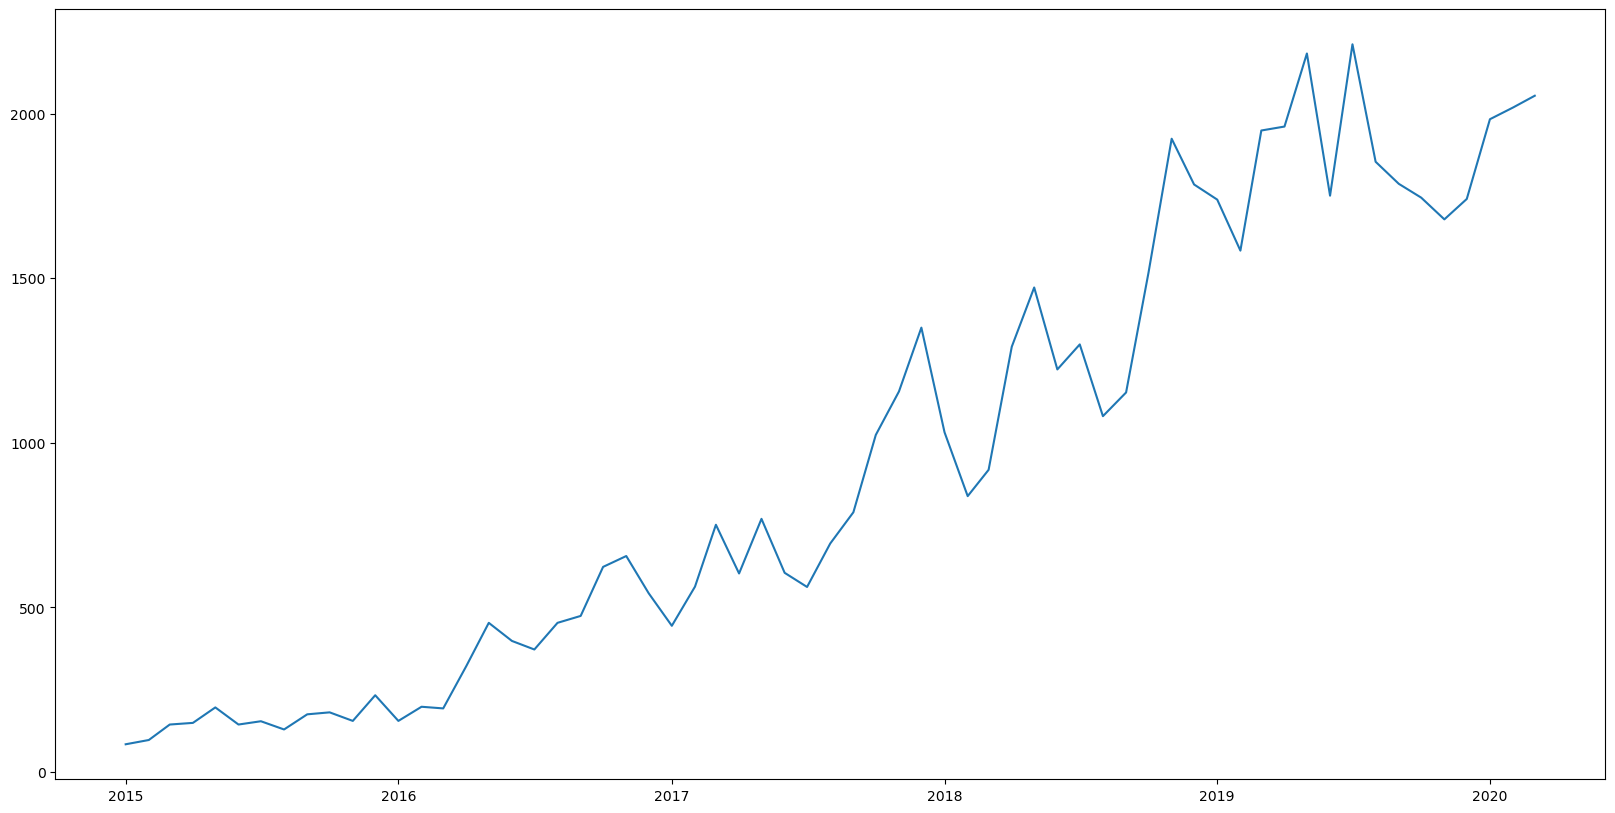

In [17]:
plt.plot(ts)

In [11]:
#1.b
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # kiszámítjuk a mozgóátlagot és szórást (12 hónapra)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    # ábrázoljuk
    orig = plt.plot(timeseries, color = 'blue', label='Orignal')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean 12')
    std = plt.plot(rolstd, color='black', label= 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Elvégezzük Dickey-Fuller tesztet:
    print ("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s) ' %key] = value
    print(dfoutput)

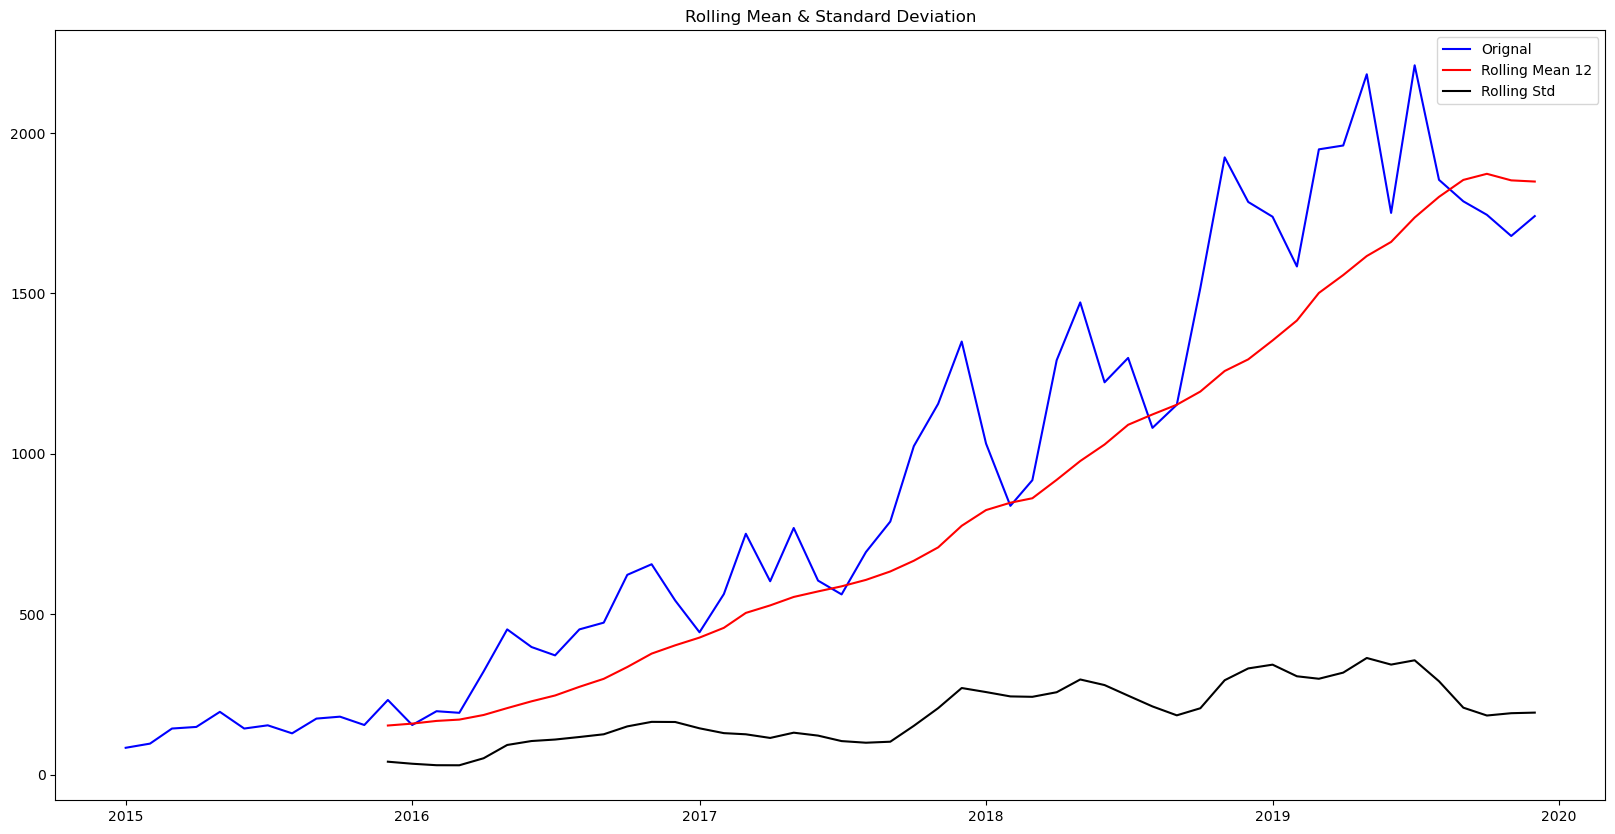

Results of Dickey-Fuller Test:
Test Statistic                 -0.403110
p-value                         0.909578
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [12]:
test_stationarity(ts)

nem stacionárius

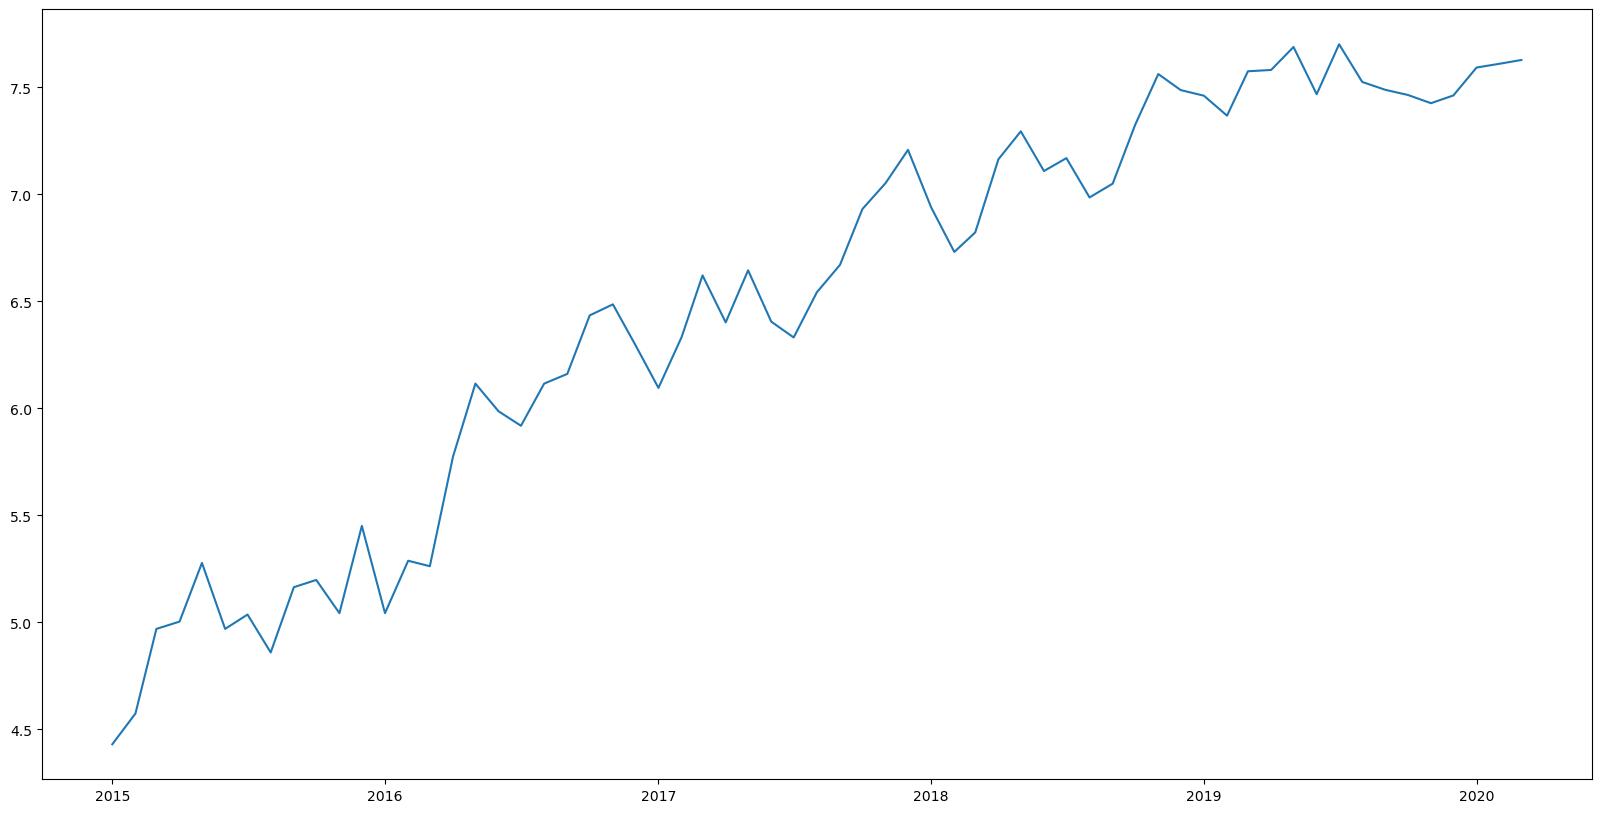

In [23]:
ts_log = np.log(ts)
plt.plot(ts_log)

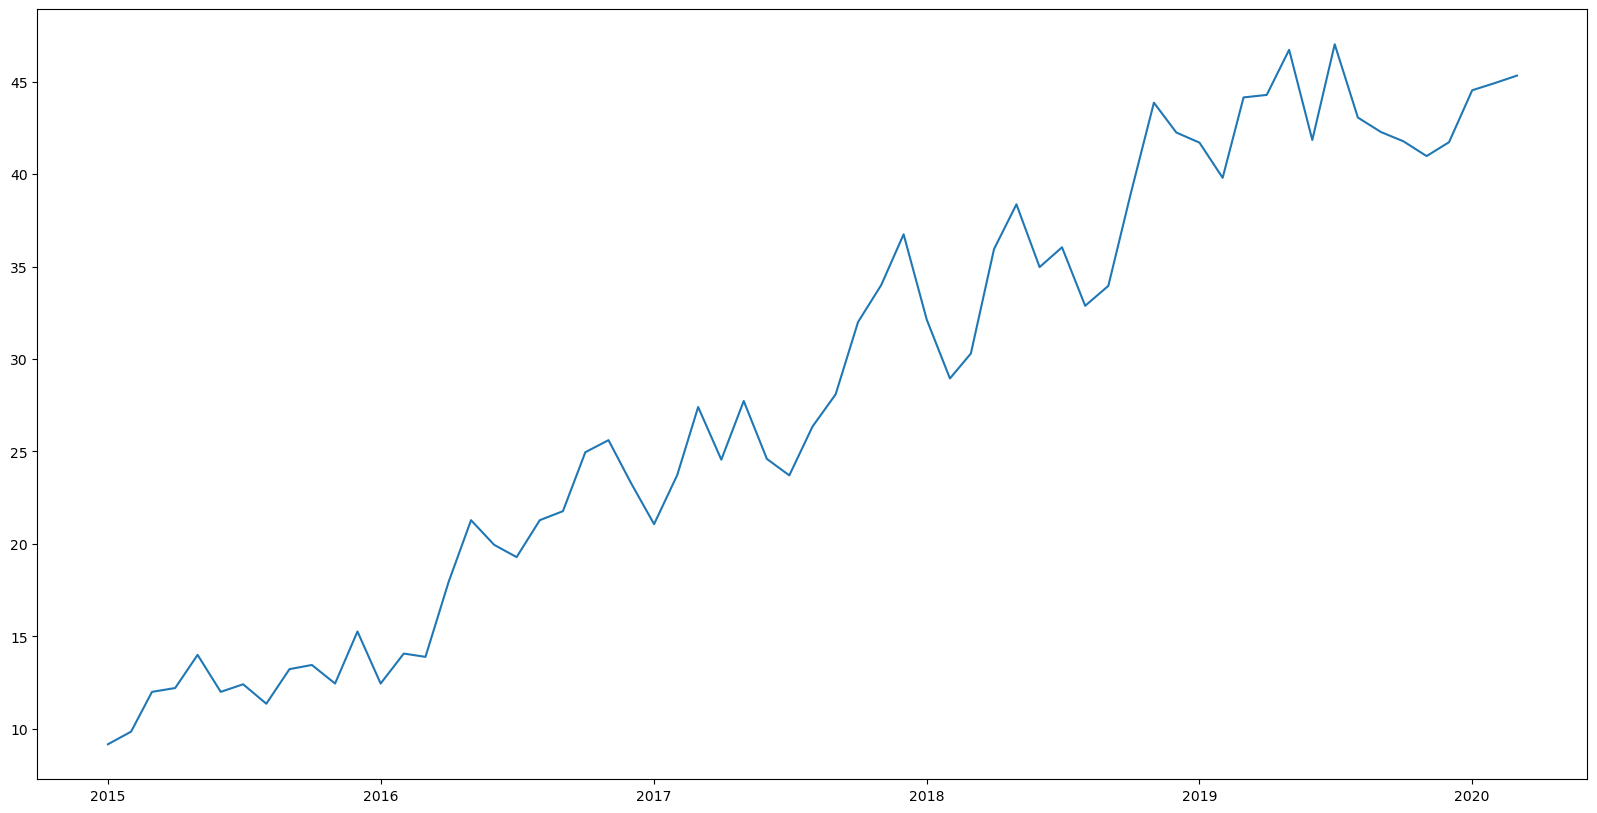

In [24]:
ts_sqrt = np.sqrt(ts)
plt.plot(ts_sqrt)

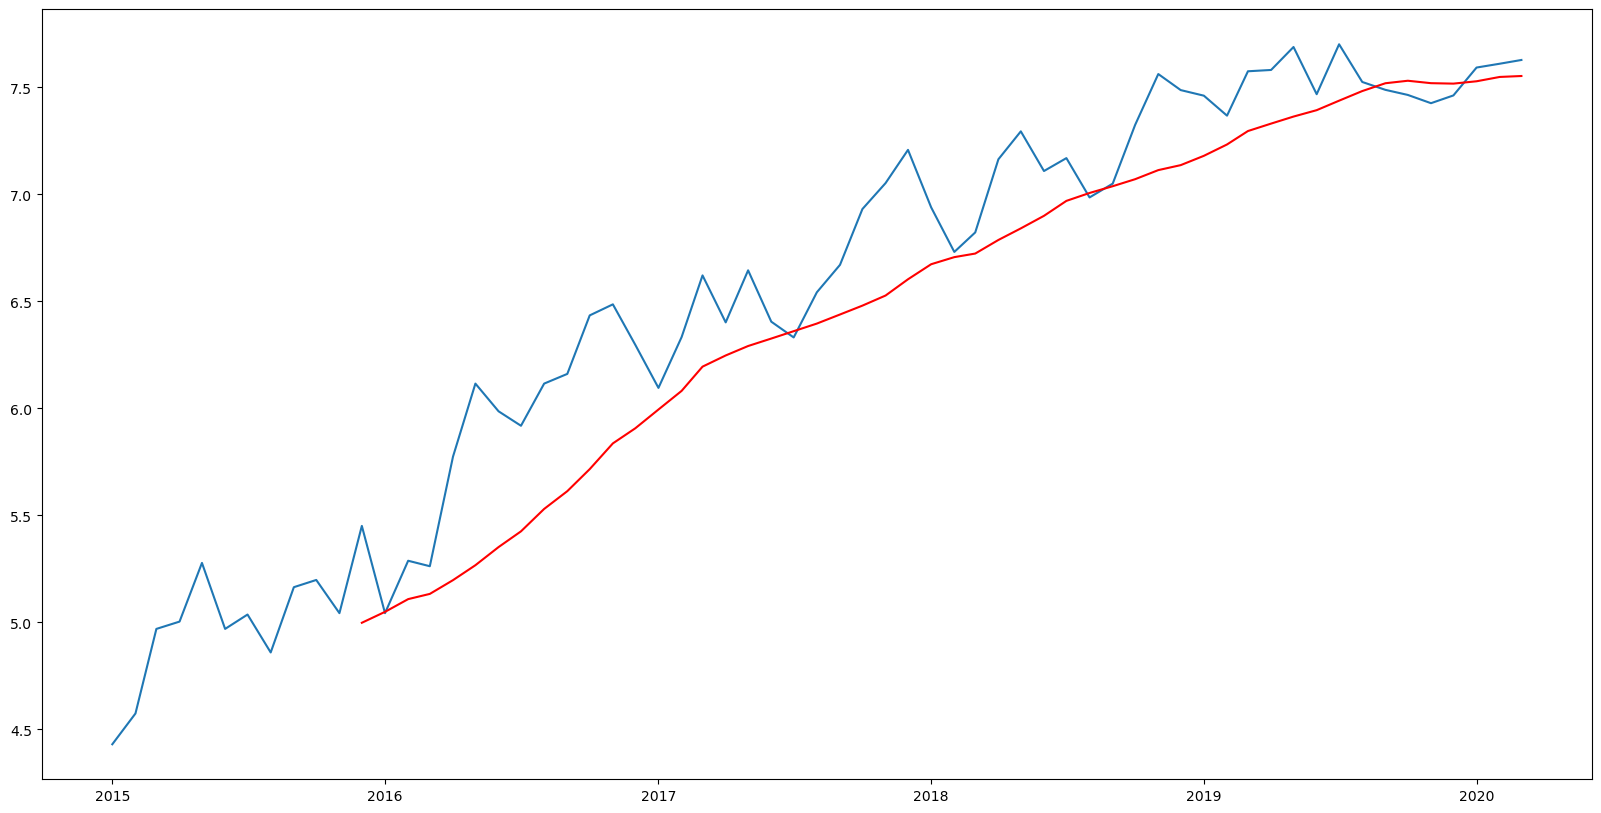

In [25]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

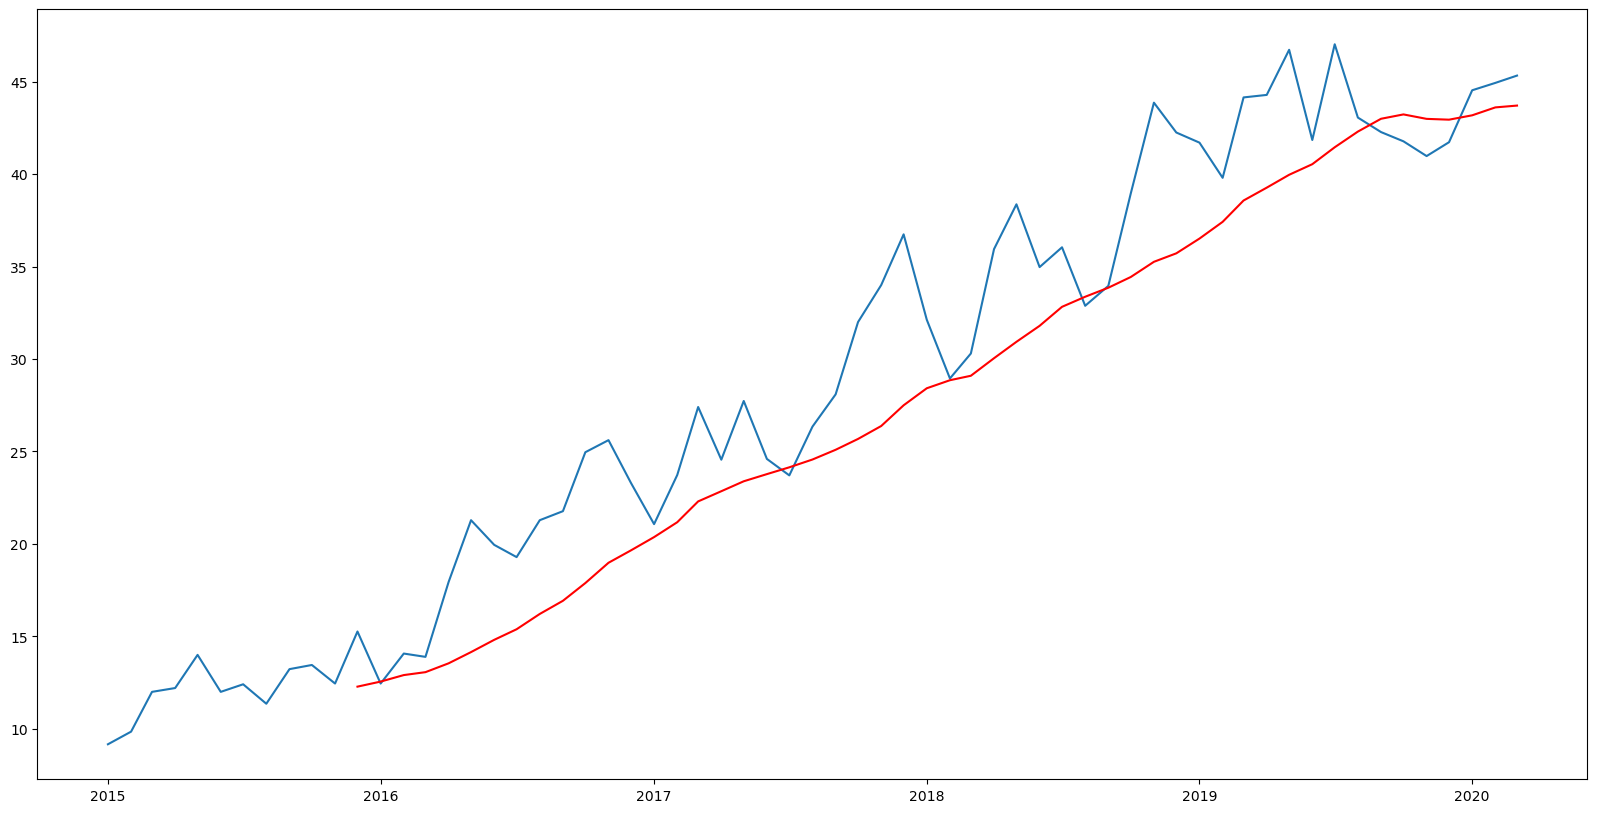

In [26]:
moving_avg_sqrt = ts_sqrt.rolling(12).mean()
plt.plot(ts_sqrt)
plt.plot(moving_avg_sqrt, color='red')

In [27]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(24)

Month
2015-01-01         NaN
2015-02-01         NaN
2015-03-01         NaN
2015-04-01         NaN
2015-05-01         NaN
2015-06-01         NaN
2015-07-01         NaN
2015-08-01         NaN
2015-09-01         NaN
2015-10-01         NaN
2015-11-01         NaN
2015-12-01    0.452561
2016-01-01   -0.006103
2016-02-01    0.179276
2016-03-01    0.129293
2016-04-01    0.576937
2016-05-01    0.848463
2016-06-01    0.634303
2016-07-01    0.493250
2016-08-01    0.585575
2016-09-01    0.547855
2016-10-01    0.718190
2016-11-01    0.649576
2016-12-01    0.390019
Name: Sales, dtype: float64

In [28]:
ts_log_moving_avg_diff_sqrt = ts_sqrt - moving_avg
ts_log_moving_avg_diff_sqrt.head(24)

Month
2015-01-01          NaN
2015-02-01          NaN
2015-03-01          NaN
2015-04-01          NaN
2015-05-01          NaN
2015-06-01          NaN
2015-07-01          NaN
2015-08-01          NaN
2015-09-01          NaN
2015-10-01          NaN
2015-11-01          NaN
2015-12-01    10.265860
2016-01-01     7.400372
2016-02-01     8.962256
2016-03-01     8.759047
2016-04-01    12.746744
2016-05-01    16.016367
2016-06-01    14.597788
2016-07-01    13.861657
2016-08-01    15.753479
2016-09-01    16.158188
2016-10-01    19.243611
2016-11-01    19.775912
2016-12-01    17.395270
Name: Sales, dtype: float64

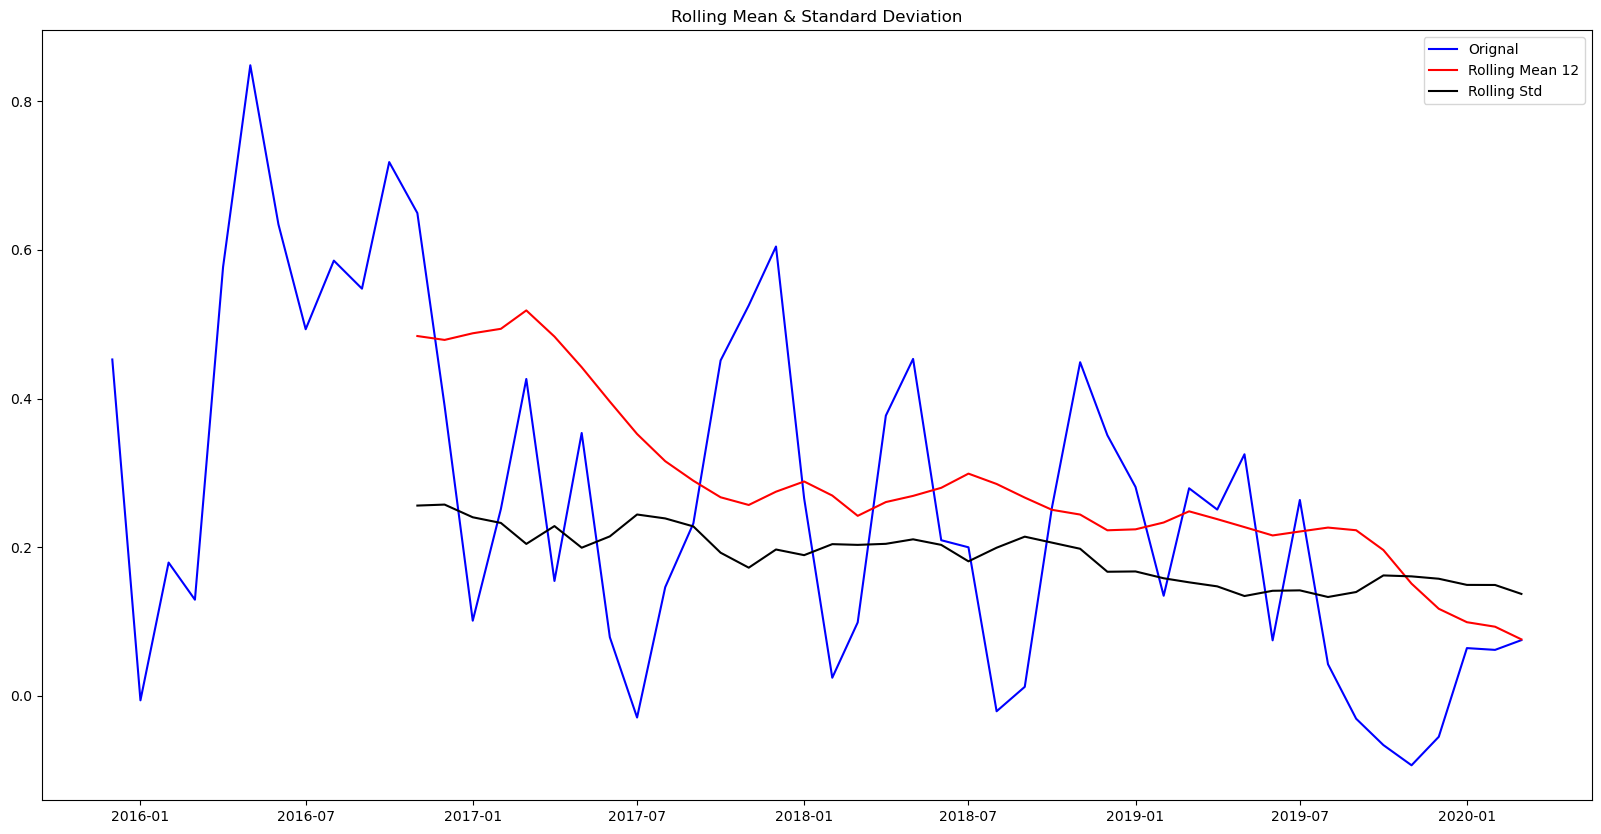

Results of Dickey-Fuller Test:
Test Statistic                 -3.189900
p-value                         0.020577
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

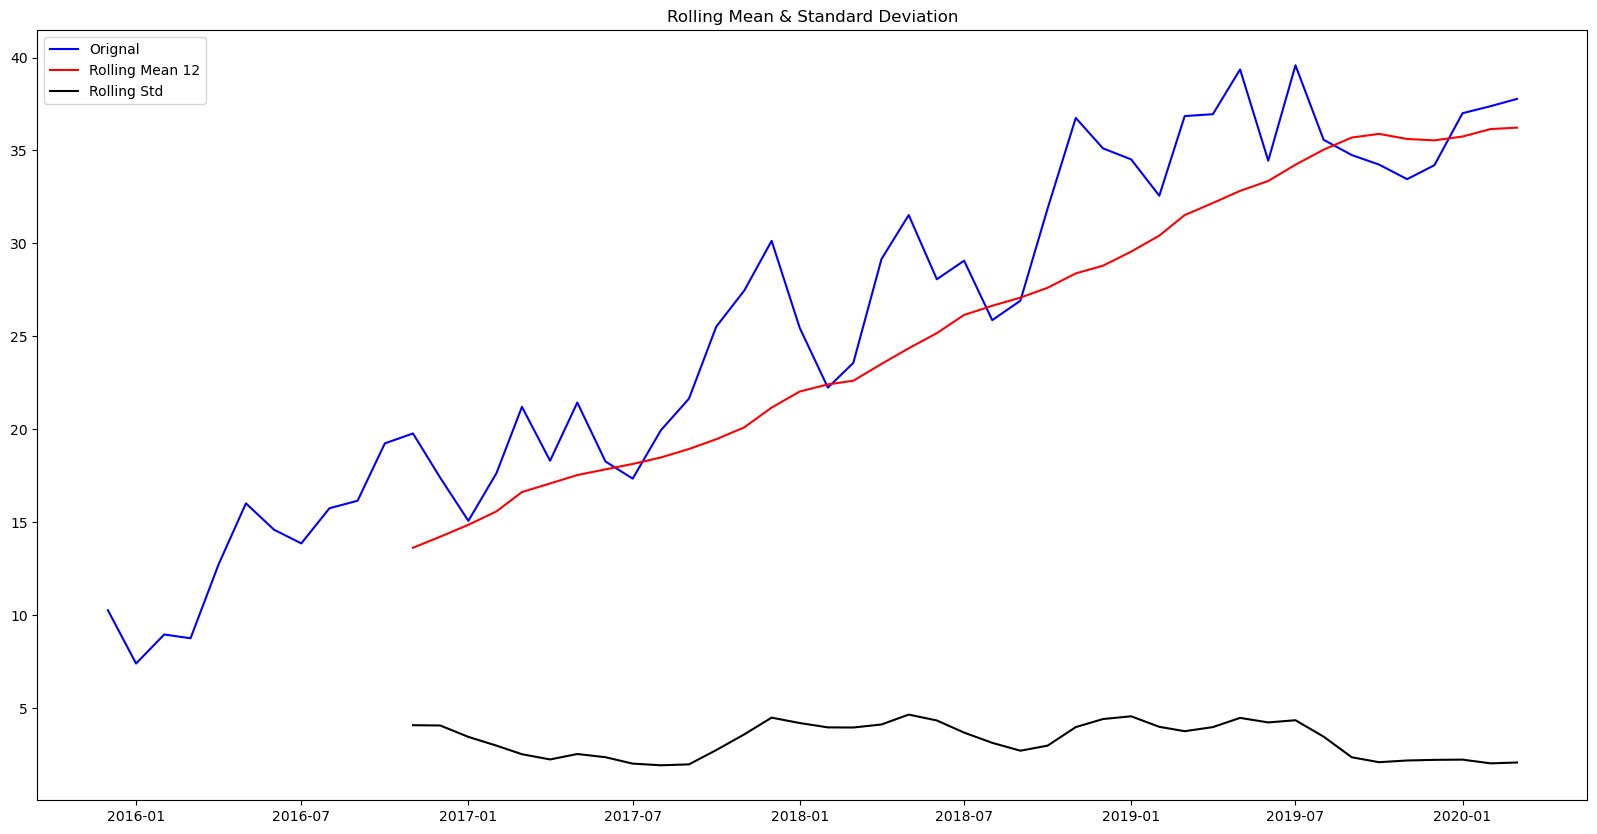

Results of Dickey-Fuller Test:
Test Statistic                 -1.322109
p-value                         0.618998
#Lags Used                      5.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [30]:
ts_log_moving_avg_diff_sqrt.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff_sqrt)

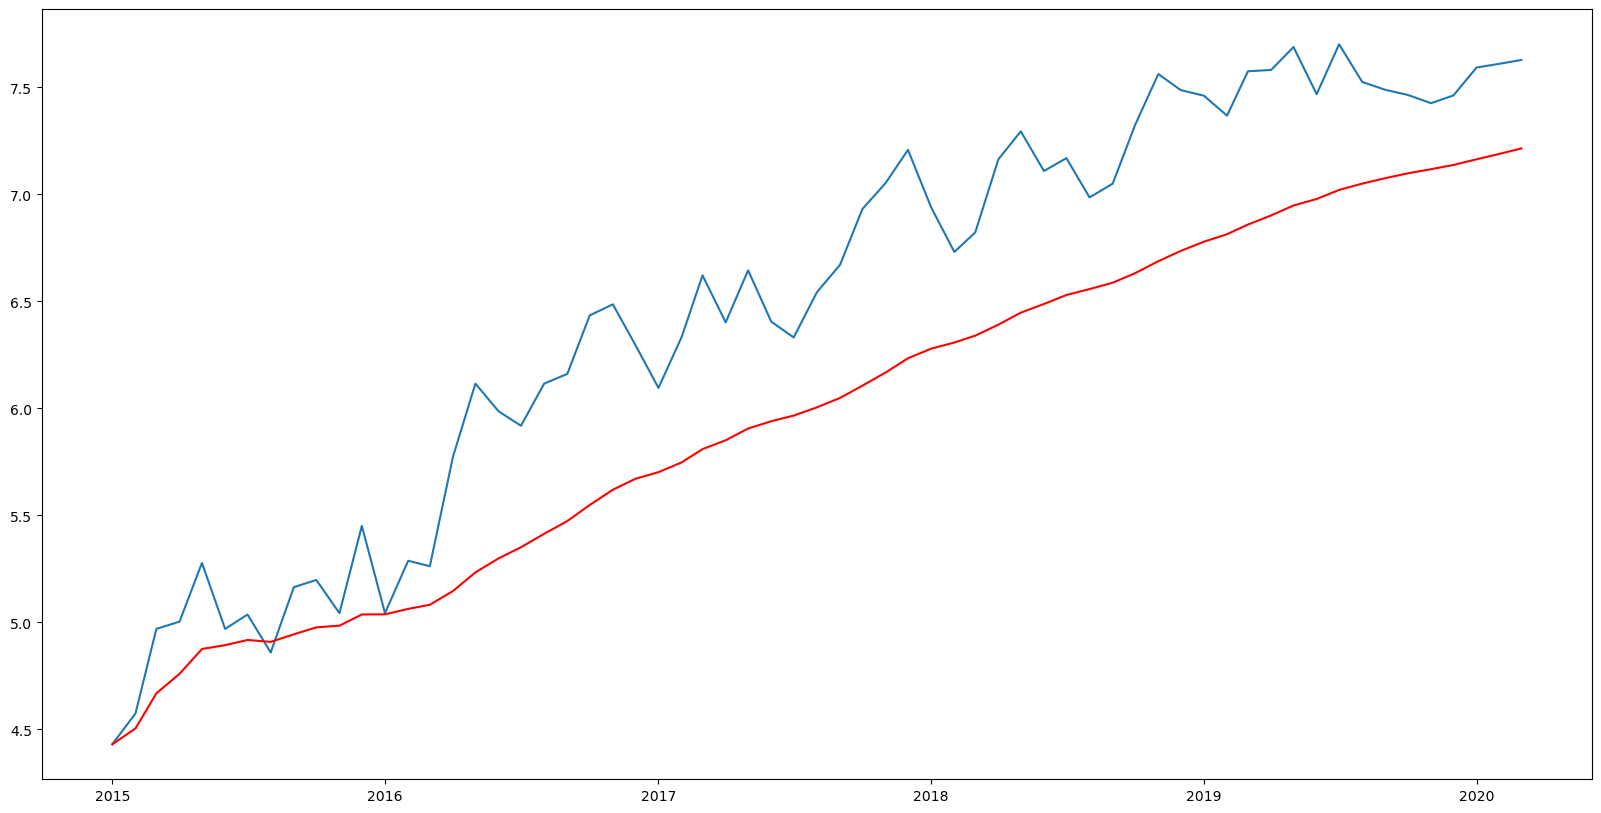

In [31]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

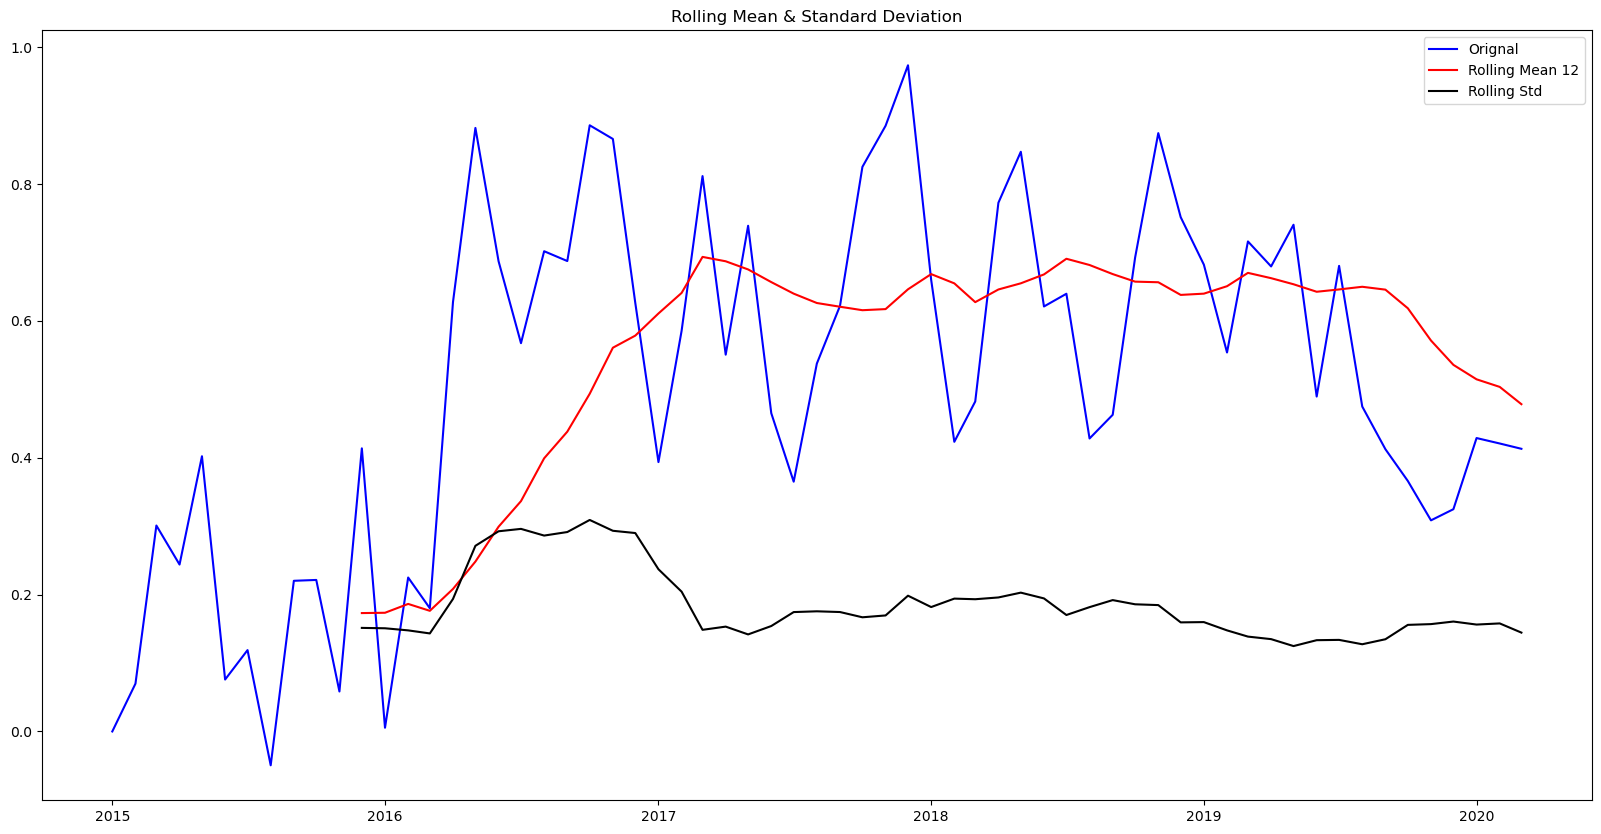

Results of Dickey-Fuller Test:
Test Statistic                 -2.648351
p-value                         0.083410
#Lags Used                      7.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


In [32]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

A gyökvonással átalakitott modellel nem mondható stacionáriusnak még a logaritmusos és az exponenciálias modellekkel igen. A logaritmusoss modellel értük el a legjobb eredményt.

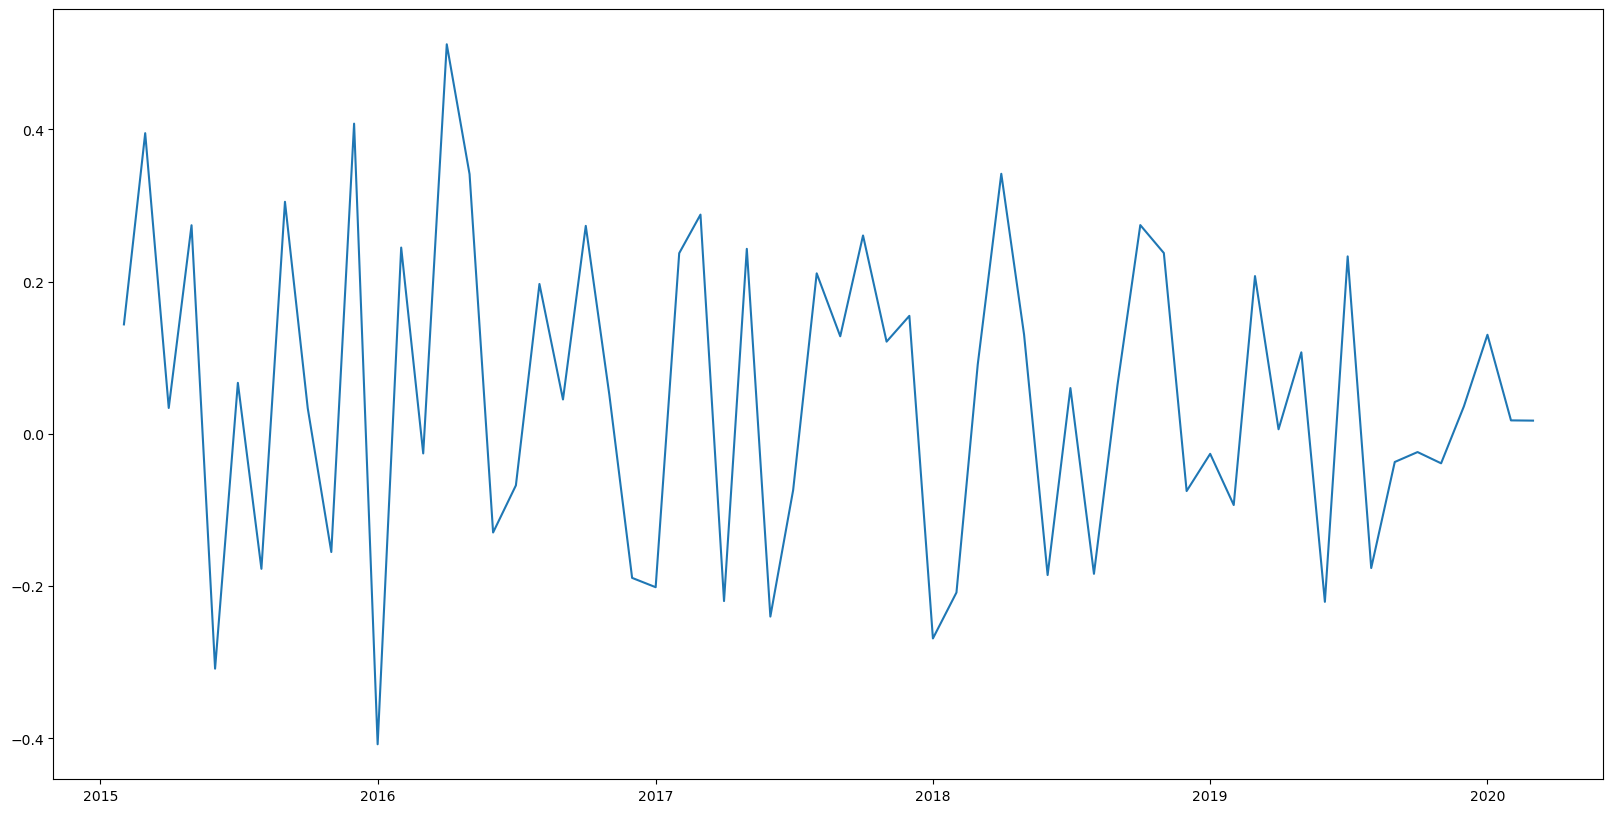

In [33]:
ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff)

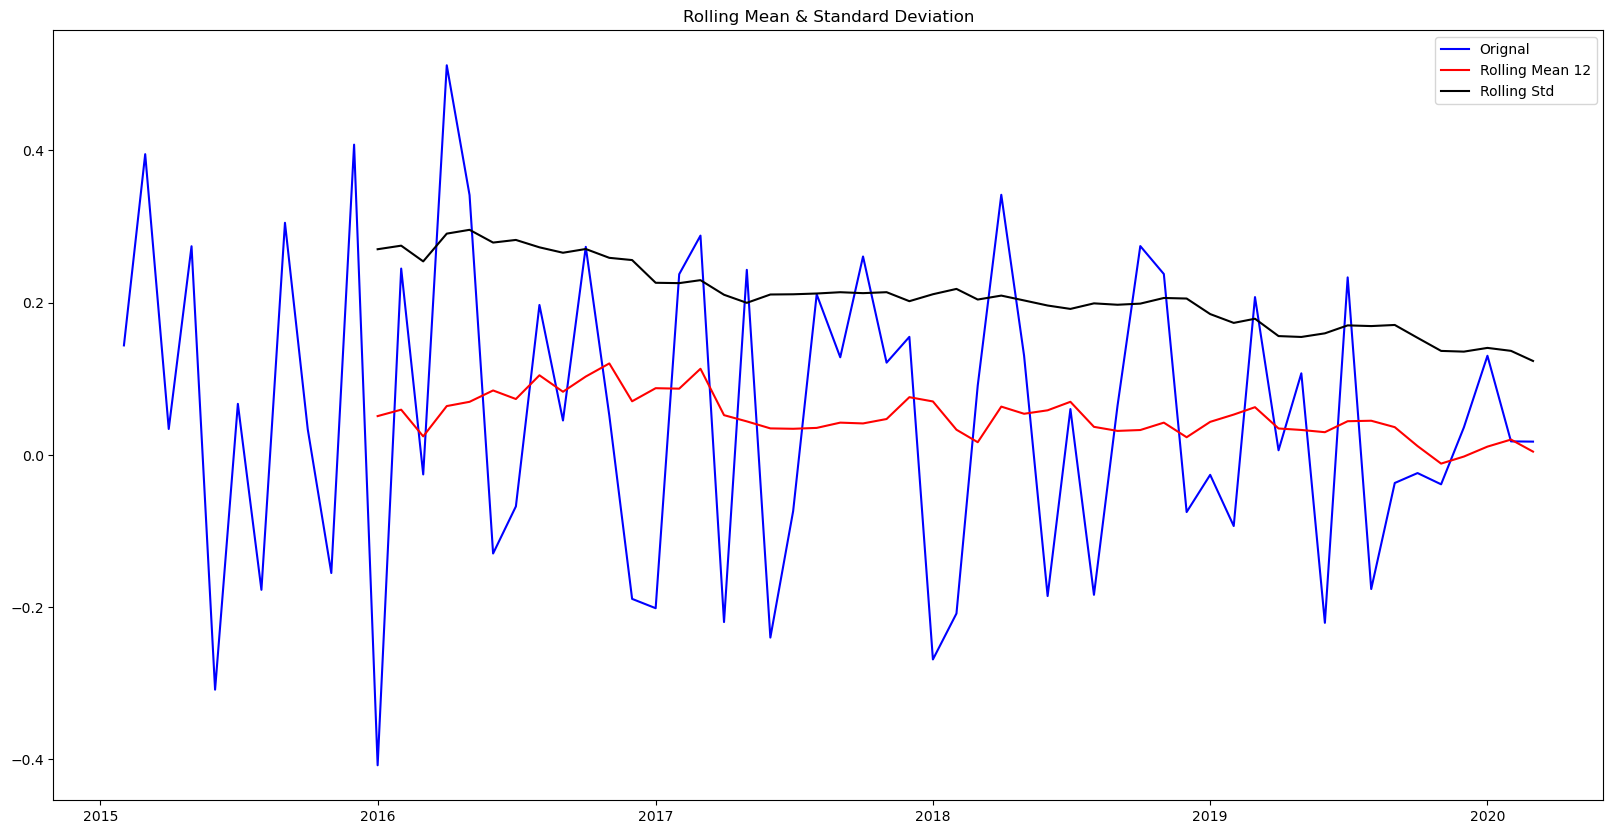

Results of Dickey-Fuller Test:
Test Statistic                -7.017210e+00
p-value                        6.684834e-10
#Lags Used                     3.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


In [34]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

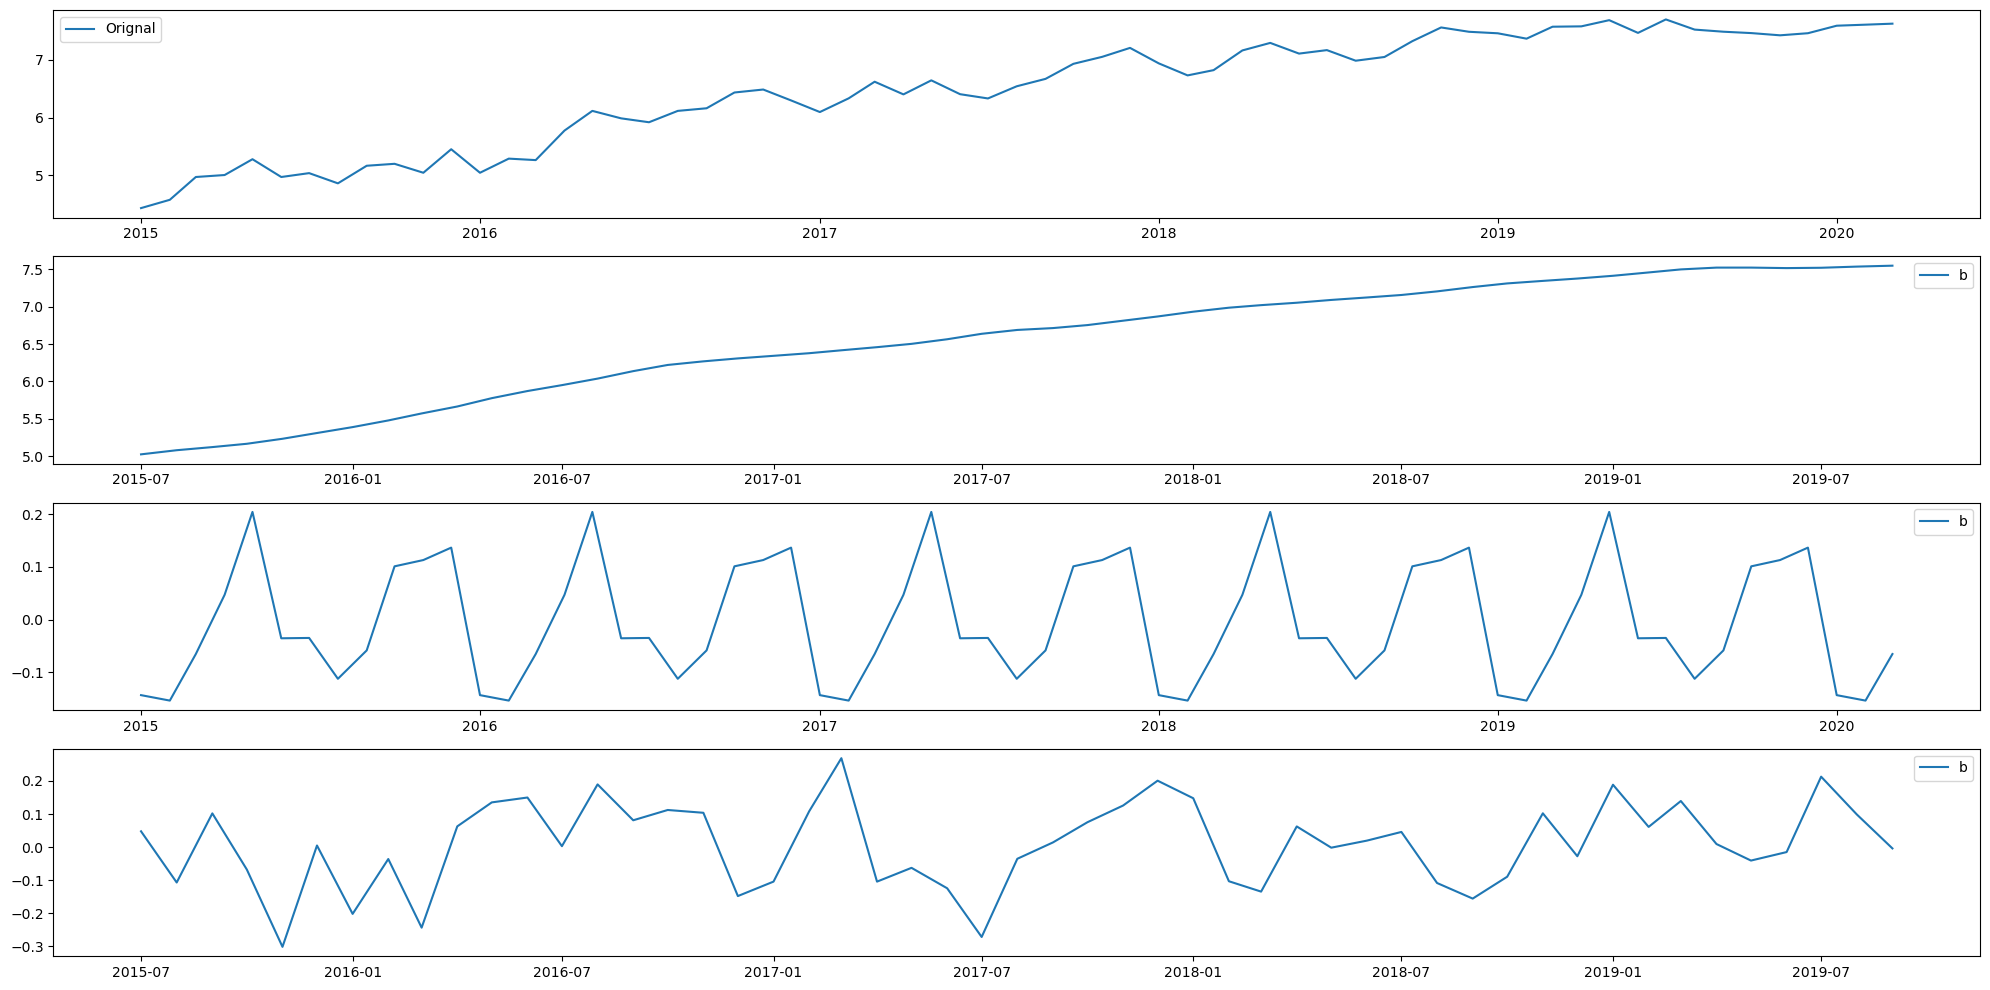

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Orignal')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend('best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend('best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend('best')
plt.tight_layout()

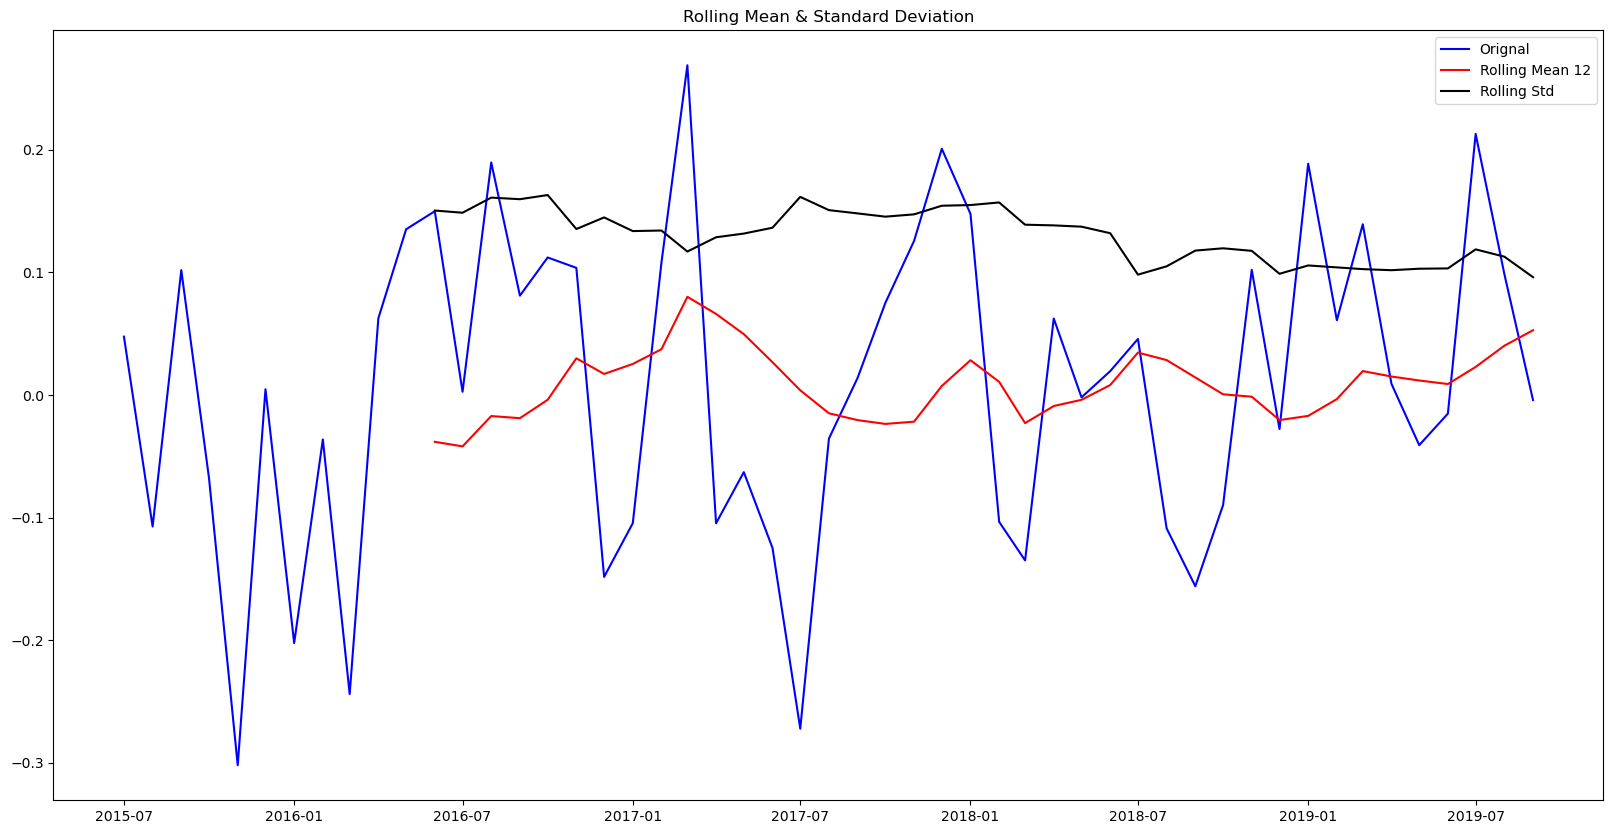

Results of Dickey-Fuller Test:
Test Statistic                 -5.370927
p-value                         0.000004
#Lags Used                      0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [36]:
ts_log_decomose = residual
ts_log_decomose.dropna(inplace=True)
test_stationarity(ts_log_decomose)

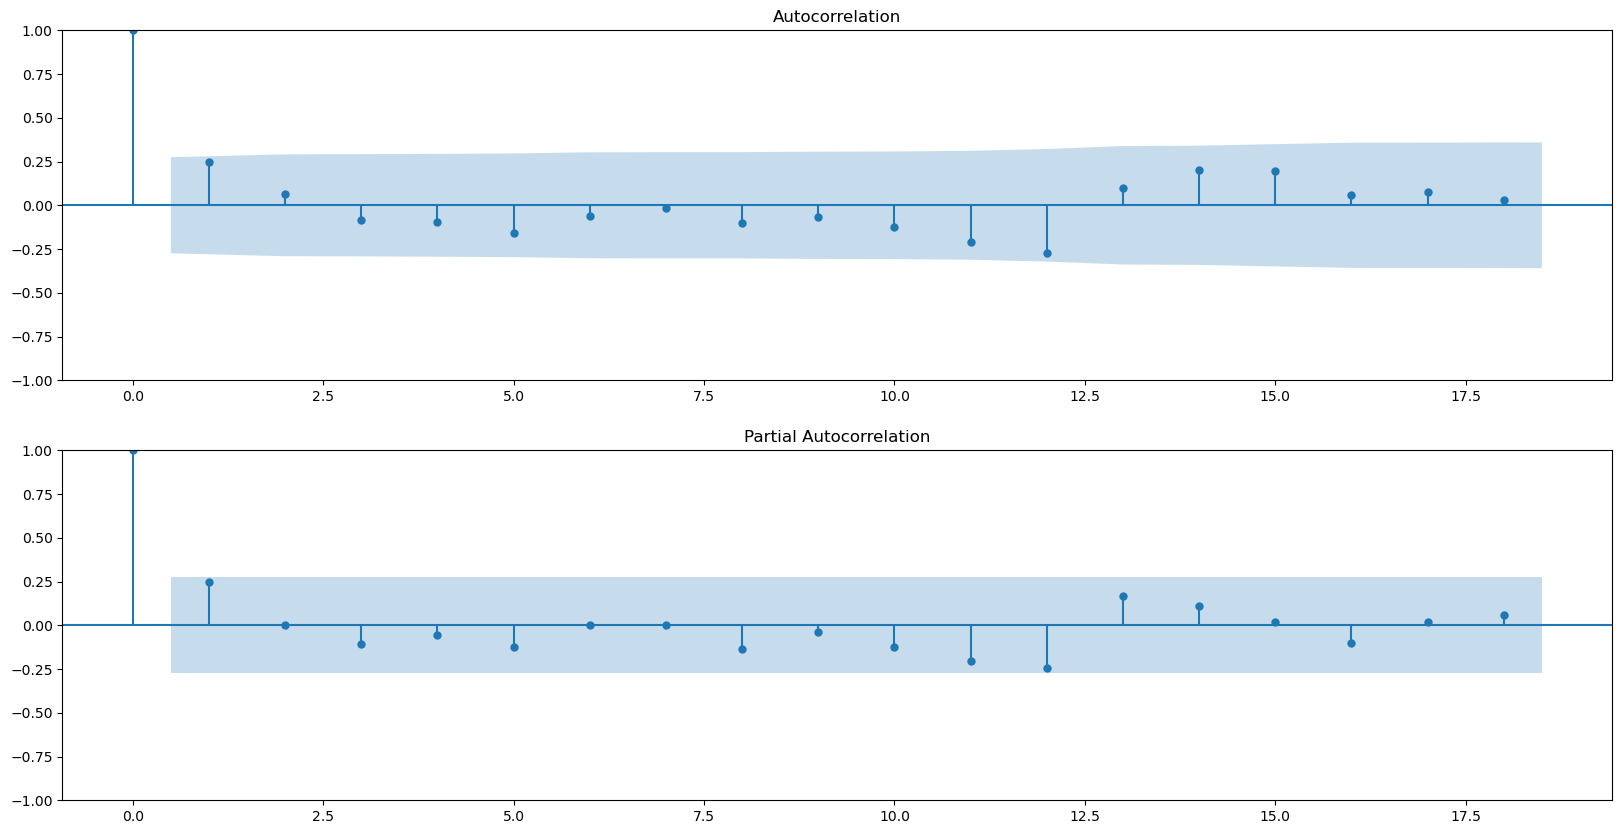

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = ts_log_decomose
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
ts_log

Month
2015-01-01    4.430817
2015-02-01    4.574711
2015-03-01    4.969813
2015-04-01    5.003946
2015-05-01    5.278115
                ...   
2019-11-01    7.425954
2019-12-01    7.462215
2020-01-01    7.592510
2020-02-01    7.610338
2020-03-01    7.627855
Name: Sales, Length: 63, dtype: float64

Text(0.5, 1.0, 'RSS: 2623.0098')

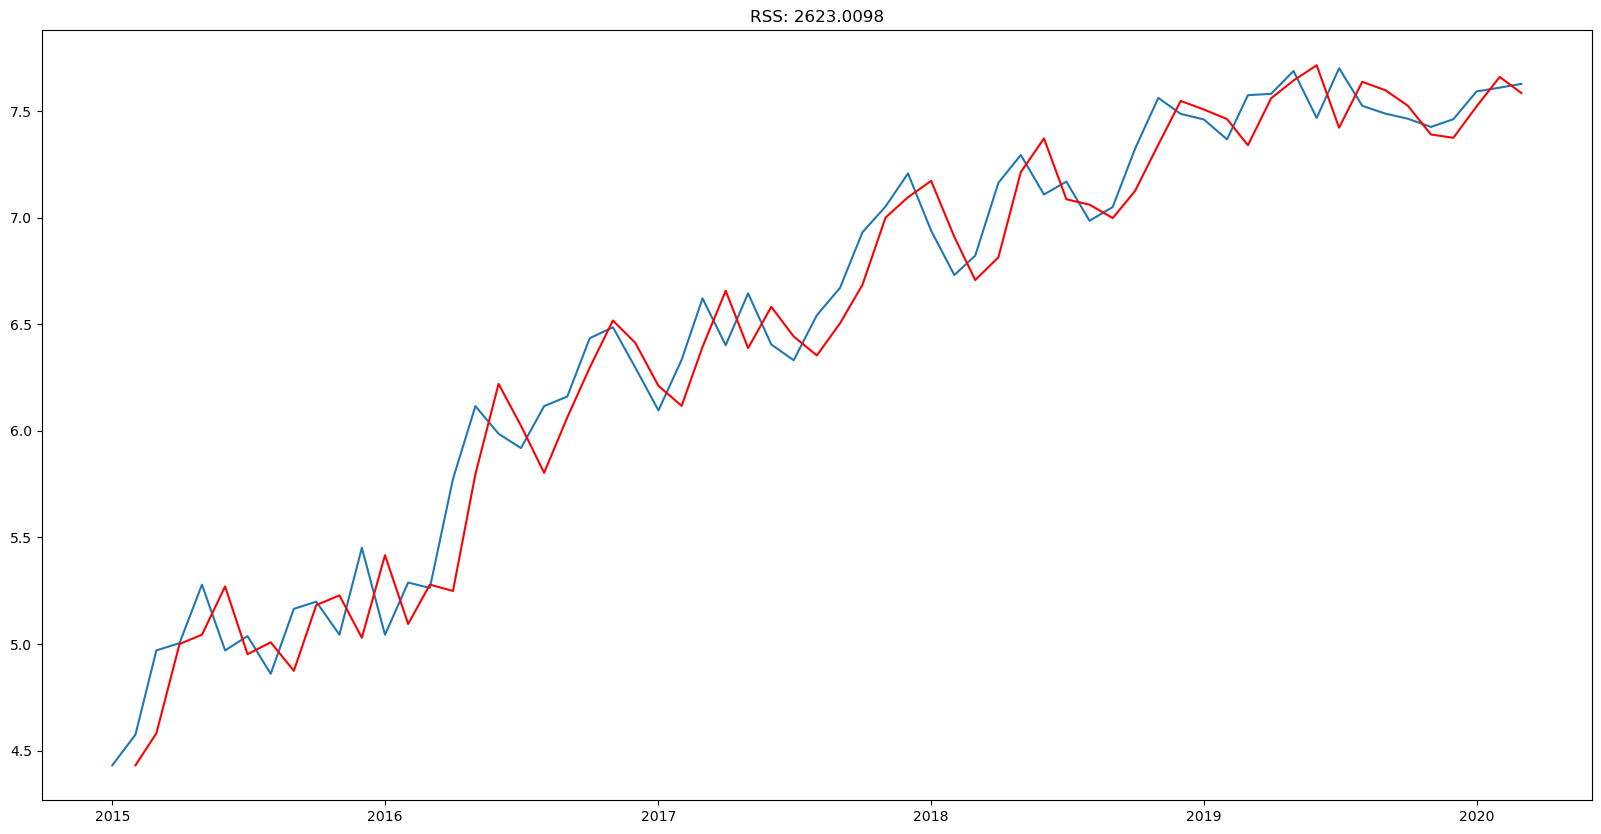

In [44]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(ts_log,order=(2,1,2))
result_AR = model.fit()
plt.plot(ts_log)
plt.plot(result_AR.fittedvalues[1:],color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues[1:] - ts_log_diff)**2))

In [43]:
result_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   63
Model:                 ARIMA(2, 0, 2)   Log Likelihood                   8.855
Date:                Sun, 24 Mar 2024   AIC                             -5.711
Time:                        17:34:45   BIC                              7.148
Sample:                    01-01-2015   HQIC                            -0.653
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1332      1.211      5.063      0.000       3.759       8.507
ar.L1          0.4735      0.462      1.026      0.305      -0.431       1.378
ar.L2          0.5093      0.459      1.110      0.267      -0.390       1.409
ma.L1          0.4510      0.463      0.974      0.330      -0.457       1.359
ma.L2          0.1145      0.154      0.744      0.457      -0.187       0.416
sigma2         0.0415      0.010      4.184      0.000       0.022       0.061
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.40   Prob(JB):                         0.35
Heteroskedasticity (H):               0.31   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'RSS: 2613.8638')

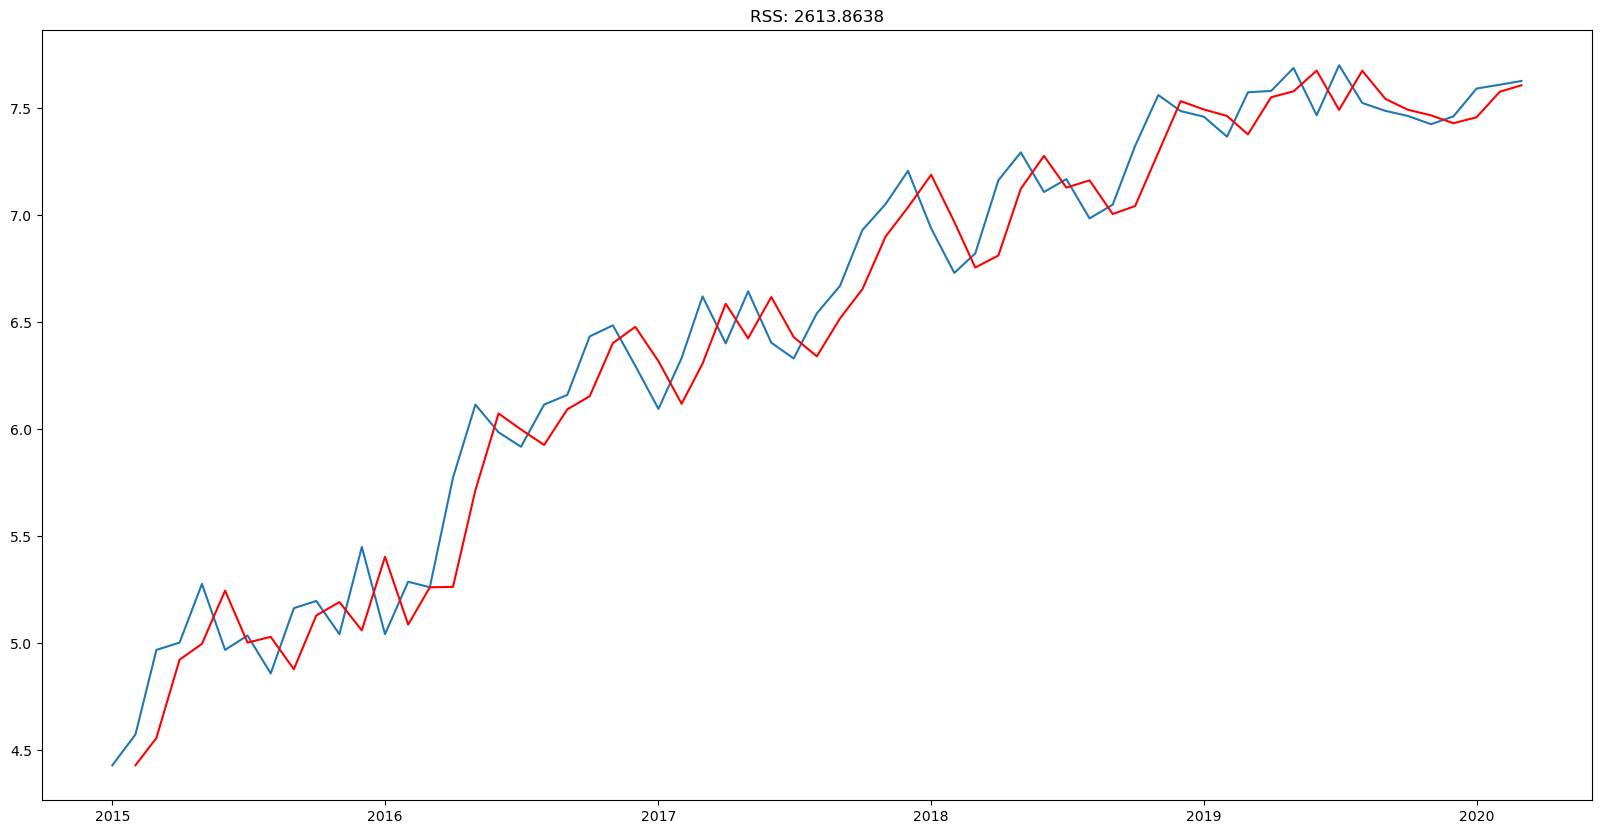

In [45]:
model = ARIMA(ts_log,order=(0,1,2))
result_MA = model.fit()
plt.plot(ts_log)
plt.plot(result_MA.fittedvalues[1:],color='red')
plt.title('RSS: %.4f'%sum((result_MA.fittedvalues[1:] - ts_log_diff)**2))

In [46]:
result_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   63
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  10.097
Date:                Sun, 24 Mar 2024   AIC                            -14.194
Time:                        17:36:20   BIC                             -7.813
Sample:                    01-01-2015   HQIC                           -11.689
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1144      0.119     -0.959      0.338      -0.348       0.119
ma.L2          0.0083      0.143      0.058      0.954      -0.272       0.288
sigma2         0.0423      0.009      4.519      0.000       0.024       0.061
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.49   Prob(JB):                         0.48
Heteroskedasticity (H):               0.28   Skew:                             0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
results = []
best_aic = float("inf")
for i in range(5):
    for j in range(5):
        model = ARIMA(ts_log,order=(i,1,j))
        aic = model.fit().aic
        model_fit = model.fit()
        rss = sum((model_fit.fittedvalues-ts_log_diff)**2)
        if aic < best_aic:
            best_model = model
            best_aic = aic
            legj = [i,1,j,best_aic]
        results.append([i,1,j, aic,rss])

In [48]:
for k in results:
    print(k)

[0, 1, 0, -17.32218205213997, nan]
[0, 1, 1, -16.19128172107529, nan]
[0, 1, 2, -14.194465177754047, nan]
[0, 1, 3, -15.324269938106042, nan]
[0, 1, 4, -13.40890849017088, nan]
[1, 1, 0, -16.240500660189404, nan]
[1, 1, 1, -14.782417219481466, nan]
[1, 1, 2, -12.361655897127253, nan]
[1, 1, 3, -15.541582370754359, nan]
[1, 1, 4, -15.760759517336503, nan]
[2, 1, 0, -14.397345504989293, nan]
[2, 1, 1, -12.881708233360971, nan]
[2, 1, 2, -13.943862457108072, nan]
[2, 1, 3, -19.146031481748064, nan]
[2, 1, 4, -20.49309415252133, nan]
[3, 1, 0, -15.66981569375308, nan]
[3, 1, 1, -14.048959743969831, nan]
[3, 1, 2, -19.963725406575932, nan]
[3, 1, 3, -18.50936617919737, nan]
[3, 1, 4, -19.538415110790424, nan]
[4, 1, 0, -14.854662906896259, nan]
[4, 1, 1, -14.330726691137052, nan]
[4, 1, 2, -20.579414434449625, nan]
[4, 1, 3, -22.47290647709746, nan]
[4, 1, 4, -20.5146869982537, nan]


In [49]:
print(legj)

[4, 1, 3, -22.47290647709746]


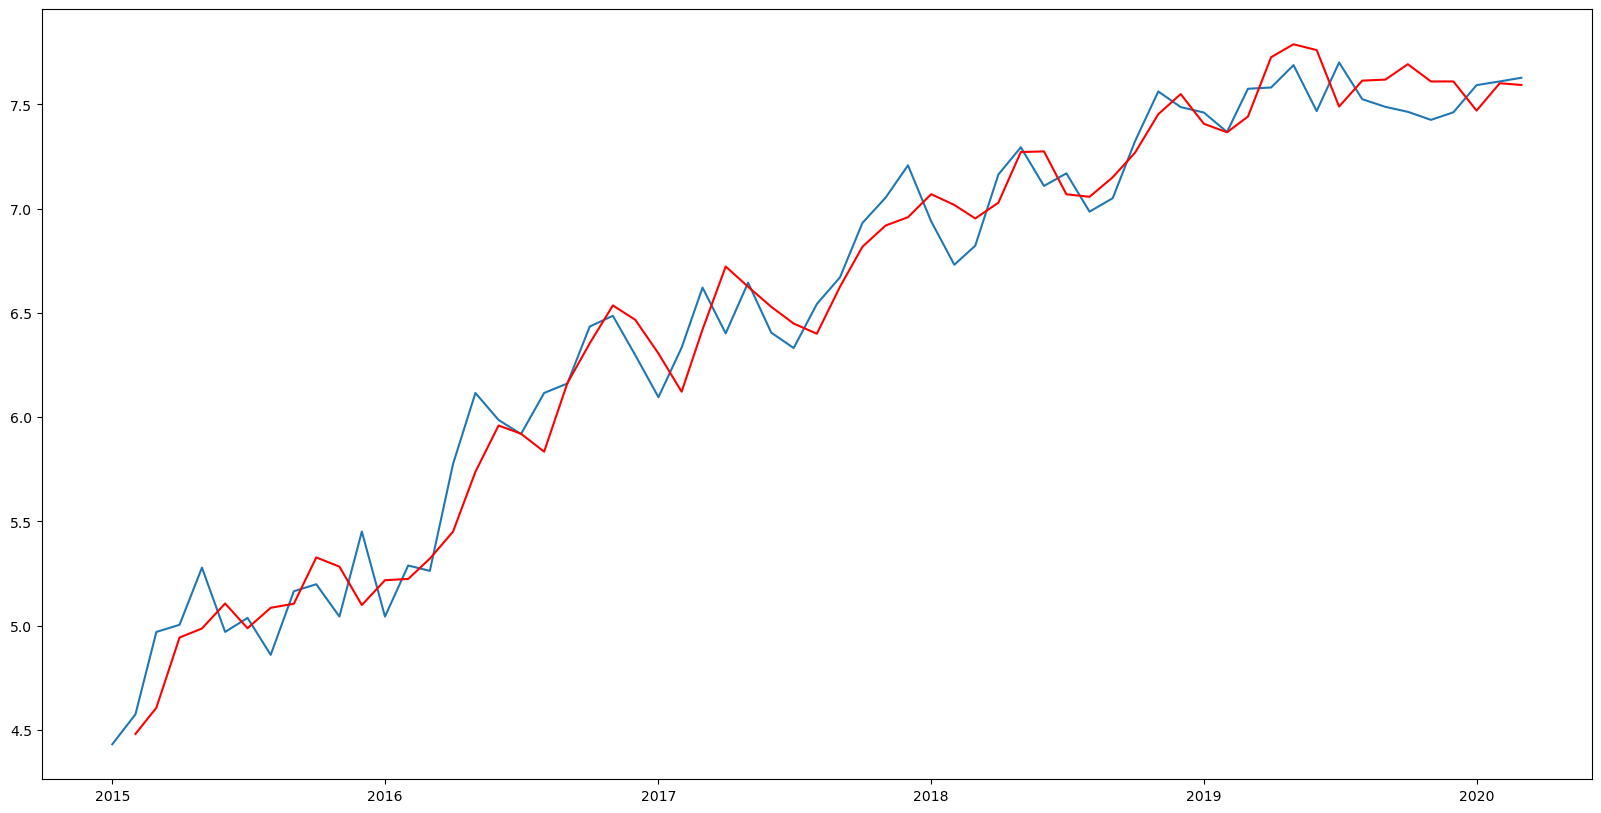

In [50]:
model = ARIMA(ts_log,order=(4,1,3),trend='t')
results_ARIMA = model.fit()
plt.plot(ts_log)
plt.plot(results_ARIMA.fittedvalues[1:], color='red')

In [51]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   63
Model:                 ARIMA(4, 1, 3)   Log Likelihood                  21.767
Date:                Sun, 24 Mar 2024   AIC                            -25.534
Time:                        17:38:37   BIC                             -6.389
Sample:                    01-01-2015   HQIC                           -18.017
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0495      0.014      3.511      0.000       0.022       0.077
ar.L1         -0.3502      0.252     -1.390      0.164      -0.844       0.143
ar.L2          0.0056      0.200      0.028      0.978      -0.387       0.398
ar.L3         -0.8714      0.152     -5.720      0.000      -1.170      -0.573
ar.L4         -0.4248      0.144     -2.942      0.003      -0.708      -0.142
ma.L1         -0.0090      0.329     -0.027      0.978      -0.654       0.636
ma.L2         -0.1301      0.336     -0.387      0.699      -0.789       0.529
ma.L3          0.7508      0.250      3.006      0.003       0.261       1.240
sigma2         0.0282      0.007      4.047      0.000       0.015       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.90   Prob(JB):                         0.45
Heteroskedasticity (H):               0.47   Skew:                             0.24
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

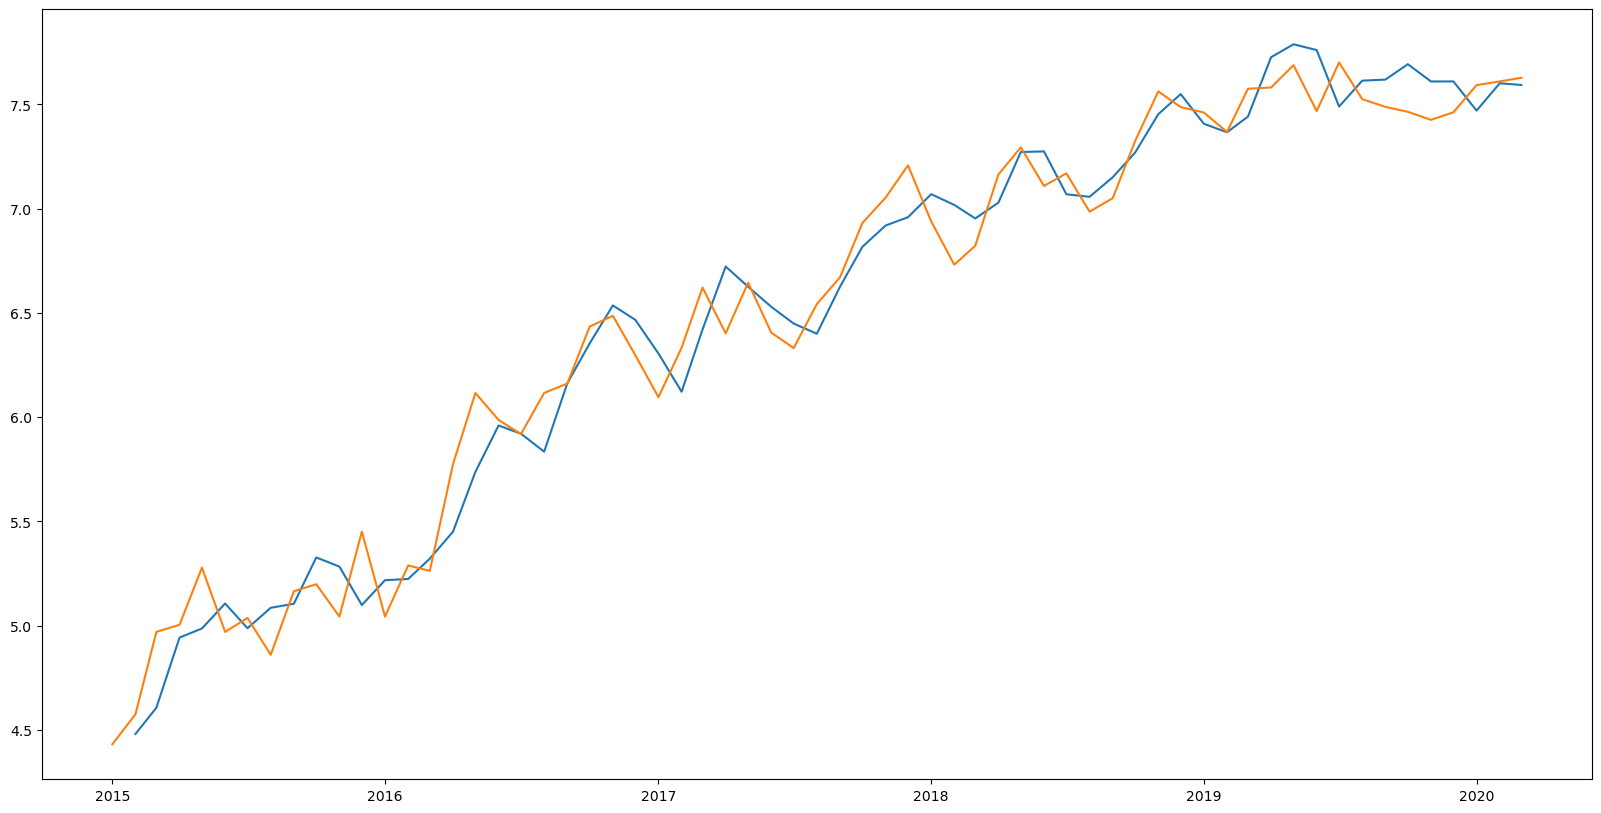

In [59]:
predict=results_ARIMA.predict()
plt.plot(predict[1:])
plt.plot(ts_log)

In [60]:
future = results_ARIMA.forecast(steps=3)

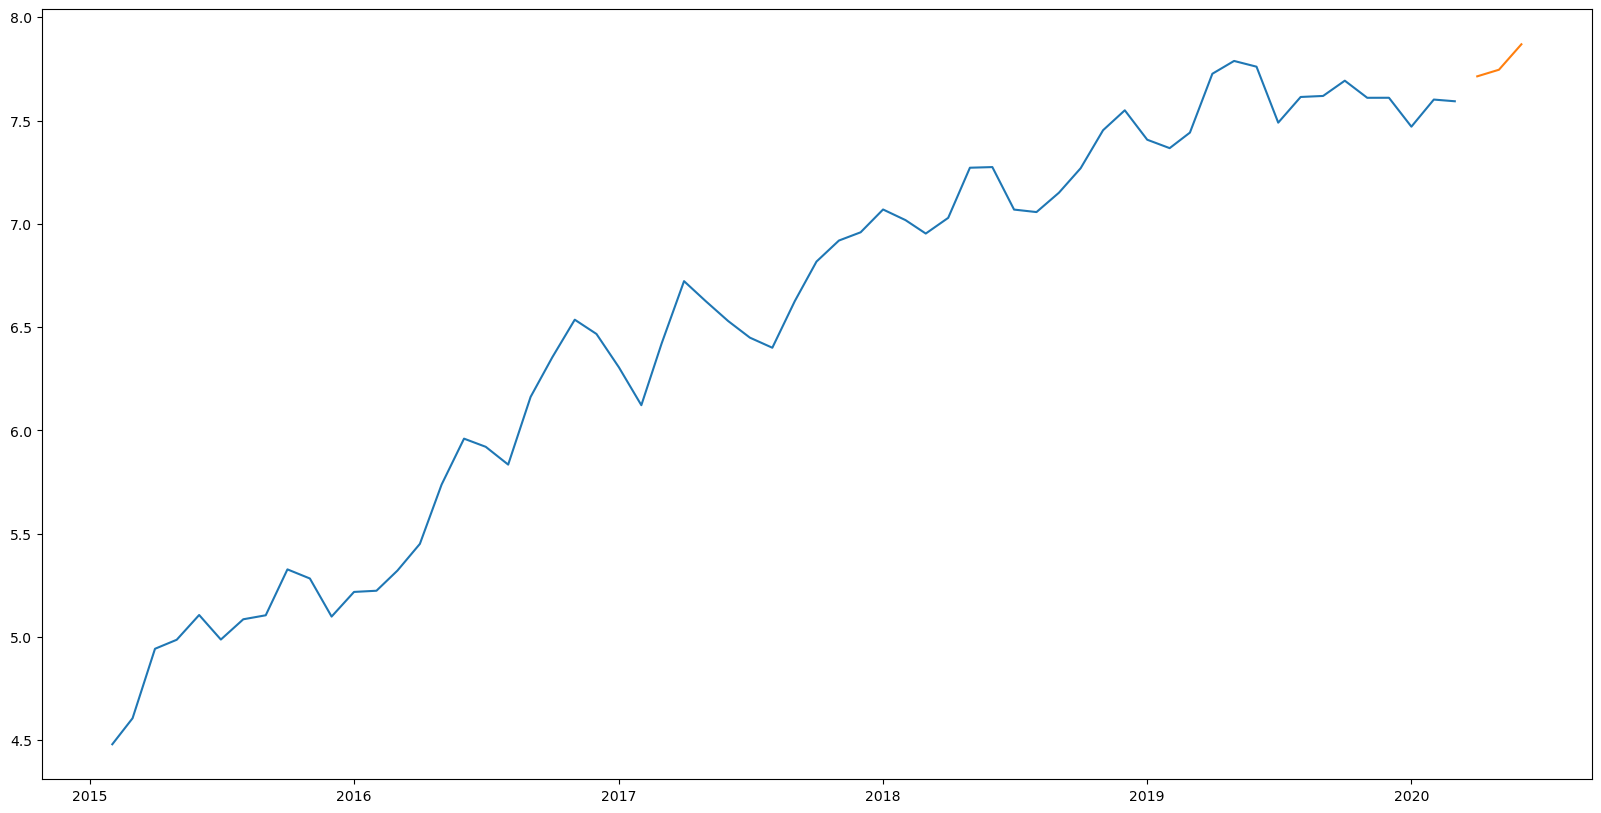

In [65]:
plt.plot(predict[1:])
plt.plot(future)